In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as ppf
%matplotlib inline

In [98]:
df=pd.read_csv('train.csv')

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


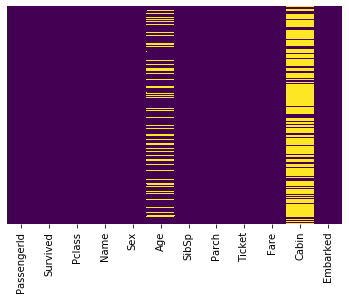

In [102]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Age and Cabin both contains null value here. We can drop the Cabin as it contains most no of null values and then fill the missing value in Age

C:\Users\yashg\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yashg\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

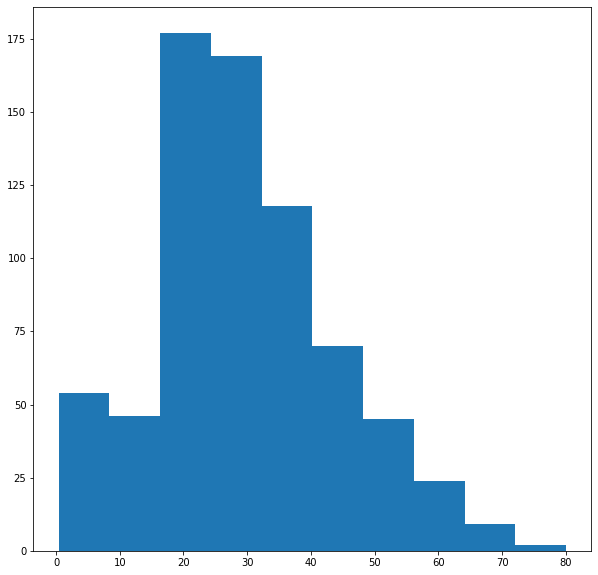

In [103]:
plt.figure(figsize=(10,10))
plt.hist(df['Age'])

We see here from range of ages there are more people between age 20 - 40 but mostly 20-32 so more no of young individuals on board

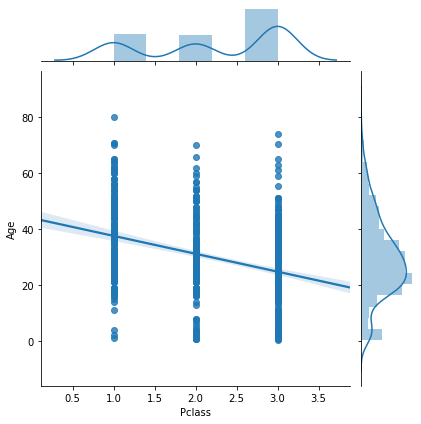

In [104]:
sns.jointplot('Pclass','Age',data=df,kind='reg')

In [105]:
df.drop('Cabin',axis=1,inplace=True)

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [107]:
def fillage(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [108]:
df['Age'] = df[['Age','Pclass']].apply(fillage,axis=1)

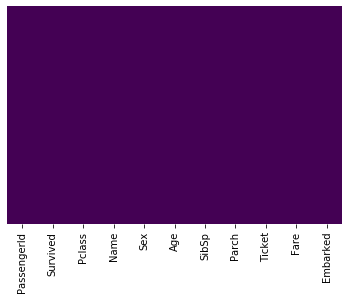

In [109]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we see no yellow lines because no null values in the dataframe

In [110]:
sex = pd.get_dummies(df['Sex'])
embark = pd.get_dummies(df['Embarked'])

In [111]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [112]:
df=pd.concat([df,sex,embark],axis=1)

In [113]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.3)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
lm=LogisticRegression()

In [118]:
lm.fit(X_train,y_train)

C:\Users\yashg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
pred=lm.predict(X_test)

In [120]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,r2_score,mean_squared_error

In [121]:
print(confusion_matrix(y_test,pred))

[[156  17]
 [ 26  69]]


In [122]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       173
           1       0.80      0.73      0.76        95

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



In [123]:
print(roc_auc_score(y_test,pred))

0.8140249467599634


In [124]:
print(mean_squared_error(y_test,pred))

0.16044776119402984


In [171]:
df1=pd.read_csv('test.csv')

In [172]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [173]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


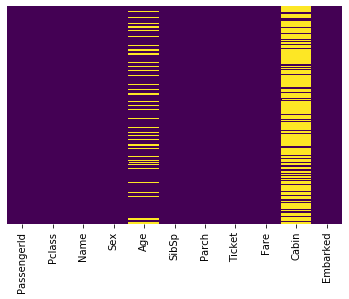

In [174]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [175]:
df1['Age'] = df1[['Age','Pclass']].apply(fillage,axis=1)

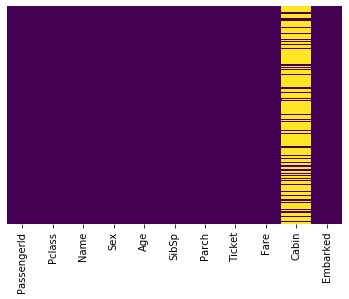

In [176]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [177]:
df1.drop('Cabin',axis=1,inplace=True)

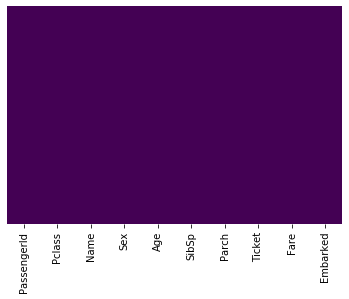

In [178]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [179]:
sex = pd.get_dummies(df1['Sex'])
embark = pd.get_dummies(df1['Embarked'])

In [180]:
sex.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [181]:
embark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
C    418 non-null uint8
Q    418 non-null uint8
S    418 non-null uint8
dtypes: uint8(3)
memory usage: 1.3 KB


In [182]:
df1.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [183]:
df1=pd.concat([df1,sex,embark],axis=1)

In [184]:
df1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [196]:
df1[np.isnan(df1['Fare'])]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
152,1044,3,60.5,0,0,NaN,0,1,0,0,1


In [199]:
df1.iloc[151:154,5:6]

,Fare
151,7.8958
152,NaN
153,12.1833


will take a middle value ie a no between 7.9 - 12.18 here as only one data point is nan in whole Frame feature

In [201]:
df1.iloc[152:153,5:6]=10.4488

In [203]:
df1.iloc[152:153,:]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
152,1044,3,60.5,0,0,10.4488,0,1,0,0,1


In [205]:
pred_t=lm.predict(df1)

In [210]:
sur=pd.DataFrame(pred_t,columns=["Survived"])

In [211]:
df1['PassengerId'].head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [212]:
sub=pd.concat([df1['PassengerId'],sur],axis=1)

In [213]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [215]:
final=sub.to_csv(index=False)

In [218]:
sub.to_csv(r'C:\Users\yashg\Py\submission.csv',index=False)